# Capstone Webscrapping using BeautifulSoup

ROBISAEFUDIN

In this particular module, we shall delve into the techniques involved in simple web scraping using the Beautiful Soup library. Web scraping is an effective method of gathering data from various online sources. In this module, we shall attempt to extract the Indonesian inflation rate data from pusatdata.kontan.co.id, which is a reliable data center associated with a leading Indonesian economic newspaper, offering a wealth of valuable financial information. To accomplish this task, we shall employ a handful of standard Python libraries in tandem with the Beautiful Soup library.

This module has been designed to be accessible and user-friendly, making it an ideal resource for novice developers to learn the fundamentals of web scraping with Beautiful Soup. However, it is recommended that individuals have some basic understanding of `HTML` markup in order to fully comprehend the concepts presented in this module. The The documentation of [beautifulsoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc) provides a brief introduction to `HTML` and a comprehensive overview of how Beautiful Soup operates, which may prove helpful for those seeking additional guidance.

## background

In this project, our objective is to extract the moving of the date and the volume  from the CoinGecko for Ethereum USD (Historical Data) . Ethereum USD refers to the price of Ethereum cryptocurrency denominated in US Dollars (USD).Like other cryptocurrencies, Ethereum's price is determined by supply and demand in the market, with the USD being one of the major fiat currencies used to trade Ethereum on various exchanges. The price of Ethereum, like other cryptocurrencies, can be highly volatile and subject to fluctuations in the market.

Some may question why we need to extract data through web scraping, when it is already presented through well-designed visualizations on the website. To illustrate, let's assume that we are tasked with forecasting ETH's volume trading rate. To accomplish this, we require accurate and reliable data, and web scraping offers a valuable means of collecting data that is not readily available to the public.

Our primary focus for web scraping will be to extract two crucial pieces of data from the Coingecko website. The data will be the Date, which is a measure of the day-over-day change in the price of trading (USD). 

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [48]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data?start_date=2022-01-01&end_date=2023-03-30#panel')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [49]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js"></script><script async defer src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" '

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [50]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [51]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<html lang="en">
 <head>
  <script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js">
  </script>
  <script async="" defer="" src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992">
  </script>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="/favicon.ico" rel="shortcut icon"/>
  <link href="/OpensearchDescription.xml" rel="search" type="applica


## Finding the right key to scrap the data & Extracting the right information

With our HTML code now in a cleaner and more organized format, our next step is to identify the specific lines or pieces of information that we wish to extract. Let us return to our webpage to proceed with this task
<img src='assets/1.png'>

Our focus lies on obtaining two key pieces of information from the website, namely the data from Date to Close Price, which are contained within the table. In order to identify the relevant code snippet for this table, we can simply move our cursor to the table, right-click on it, and select "Inspect Element". This will allow us to view the HTML code associated with the table and obtain the necessary information.
<img src='assets/2.png'>

From inspect element we know that we need to find the line table with class `baris-scroll`. We can use the find method at our beautifusoup object. Let's also call our object to see what we get. 

In [52]:
#NOTE TAMBAHAN 1

url_get #respon 02 artinya tidak bisa ditarik informasinya makanya error terus tabble perttify nya.

#table.prettify itu jika error artinya tidak dapat menghasilkan informasi.

<Response [200]>

### Note Tambahan 1
When attempting to run the command **"print(table_body.prettify()[1:500])"**, an error was consistently encountered, indicating that the "prettify" method or object could not be found (no information can be received). This error message said that the website being accessed had imposed certain restrictions.

Further investigation by running "url_get" confirmed the presence of these restrictions, as the response returned was <Response [403]>. It means the website was put some restriction.

To resolve this issue, it is recommended to install the "requests==2.28.1" package via PIP **"pip install requests==2.28.1"**. This installation will help to overcome the restrictions, as evidenced by the subsequent execution of "url_get", which returned a response of <Response [200]>, indicating that the restrictions had been lifted or in other words no restriction anymore.

In [53]:
# find the table body element
table_body = soup.find('tbody', {'data-target': 'historical.tableBody'})
print(table_body.prettify()[1:500])

tbody data-target="historical.tableBody">
 <tr>
  <th class="font-semibold text-center" scope="row">
   2023-03-30
  </th>
  <td class="text-center">
   $216,268,184,817
  </td>
  <td class="text-center">
   $10,395,388,839
  </td>
  <td class="text-center">
   $1,795.54
  </td>
  <td class="text-center">
   N/A
  </td>
 </tr>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2023-03-29
  </th>
  <td class="text-center">
   $213,909,228,255
  </td>
  <td class="text-center">
   $9,5


After extracting the relevant line of code, we have obtained all the necessary content. The ` tbody` is used to define a division or section in an HTML document, and can be easily styled using the class or id attribute. Any type of content can be included within a `tbody` tag.

The find() function is particularly useful for obtaining specific parts of the HTML code. While most of the HTML is contained within `tbody` tags, you can differentiate between them using the `attrs=` attribute, which allows you to insert any attribute of the div tag to help locate the desired content.

Now, we need all the infomation before we filter to the specific purpose. As you can read from the code above, date is contained within `tbody` with `text-center` for the data of the market cap untill close.

Now I will introduce you to other useful function from beautiful soup, that's `find_all`. While the `find` fuction method is used for finding out the **first tag** with the specified name or id and returning an object of type bs4. The find_all method is used for finding out **all tags** with the specified tag name or id and returning them as a list of type bs4.


For example I'll try to extract the first 5 data of date information from the html. You can use slicer to help you.

In [54]:
table_body.find_all('th', attrs={'class': 'font-semibold text-center', 'scope': 'row'})[:5]

[<th class="font-semibold text-center" scope="row">2023-03-30</th>,
 <th class="font-semibold text-center" scope="row">2023-03-29</th>,
 <th class="font-semibold text-center" scope="row">2023-03-28</th>,
 <th class="font-semibold text-center" scope="row">2023-03-27</th>,
 <th class="font-semibold text-center" scope="row">2023-03-26</th>]

### Extacting the Information
Now all the `beautiful soup` part is over. All left to do is doing some programming to extract all the data automaticly, you can do this manualy at this part but if your data too long I advice you use loop. I'll show you how to make looping for extracting the data, but before that let's check how long is our data to help our looping process. Since `find_all` will always return data in format list, we will use `len()` to check how long is our list.

Finding row length.

In [55]:
row = table_body.find_all('th', attrs={'class': 'font-semibold text-center', 'scope': 'row'})
row_length = len(row)
row_length

60

Do the scrapping process by:

- First we need to establish a placeholder to receive the information that we scrap.
- We named our placeholder `output_rows` and it's a list.
- Then we will make a loop through all rows in the table body, then since the code for all columns (but Date) were the same, we should make them seperated for each.
- Then we will append it to our tuple that we prepared before, 
- every one iteration we will scrap one line of the table.  

In [56]:
output_rows = [] #init

# loop through all rows in the table body
for row in table_body.find_all('tr'):
    
    # extract the date from the first cell
    date = row.find('th', {'class': 'font-semibold text-center', 'scope': 'row'}).text.strip()

    # extract data from the remaining cells
    data_cells = row.find_all('td', {'class': 'text-center'})
    market_cap = data_cells[0].text.strip()    #diurutkan dari 0. Ini untuk kolom 2
    volume = data_cells[1].text.strip()        # kolom 3
    open_price = data_cells[2].text.strip()    #4
    close_price = data_cells[3].text.strip()   #5

    # add the output row to the list
    output_rows.append((date, market_cap, volume, open_price, close_price))

# print the output rows
for row in output_rows:
    print(row)

    

('2023-03-30', '$216,268,184,817', '$10,395,388,839', '$1,795.54', 'N/A')
('2023-03-29', '$213,909,228,255', '$9,548,011,564', '$1,776.04', '$1,795.54')
('2023-03-28', '$206,685,090,341', '$9,757,415,238', '$1,719.17', '$1,776.04')
('2023-03-27', '$214,528,709,137', '$8,417,258,785', '$1,776.87', '$1,719.17')
('2023-03-26', '$211,355,889,911', '$8,023,849,174', '$1,753.98', '$1,776.87')
('2023-03-25', '$212,072,713,258', '$11,601,017,882', '$1,751.22', '$1,753.98')
('2023-03-24', '$219,518,418,514', '$10,980,967,035', '$1,824.96', '$1,751.22')
('2023-03-23', '$210,285,658,211', '$13,820,716,100', '$1,747.64', '$1,824.96')
('2023-03-22', '$218,008,486,914', '$10,831,022,955', '$1,811.41', '$1,747.64')
('2023-03-21', '$209,763,828,560', '$12,973,595,973', '$1,744.44', '$1,811.41')
('2023-03-20', '$217,844,457,988', '$10,745,813,975', '$1,801.37', '$1,744.44')
('2023-03-19', '$213,123,927,233', '$11,976,182,095', '$1,769.43', '$1,801.37')
('2023-03-18', '$215,660,560,705', '$14,459,727,61

## Creating data frame & Data wrangling

Put the array into dataframe

In [57]:
import pandas as pd

df =pd.DataFrame(output_rows, columns= ['date', 'market_cap', 'volume', 'open_price', 'close_price'])
df.head()

,date,market_cap,volume,open_price,close_price
0,2023-03-30,"$216,268,184,817","$10,395,388,839","$1,795.54",N/A
1,2023-03-29,"$213,909,228,255","$9,548,011,564","$1,776.04","$1,795.54"
2,2023-03-28,"$206,685,090,341","$9,757,415,238","$1,719.17","$1,776.04"
3,2023-03-27,"$214,528,709,137","$8,417,258,785","$1,776.87","$1,719.17"
4,2023-03-26,"$211,355,889,911","$8,023,849,174","$1,753.98","$1,776.87"


Let's check the data type for each column:

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         60 non-null     object
 1   market_cap   60 non-null     object
 2   volume       60 non-null     object
 3   open_price   60 non-null     object
 4   close_price  60 non-null     object
dtypes: object(5)
memory usage: 2.5+ KB


**Now, we do the cleaning**

As we can see that we need to change 
- `date` to 'datetime'
- `market cup, volume, open_price, and close_price` to 'numeric'

However, since the data consist of several characters such as '$' and ',' we should eliminate them then we can convert them to numeric.

Before we do that, as we can see that the order of the date was reversed when we did `loop`. So, we can use sort_value by `date` then change the `date` to datetime and then do `.sex_index('date')`


In [59]:
#change 'date' to DATETIME
df['date'] = pd.to_datetime(df['date'])

#sort value by 'date'
df = df.sort_values(by='date')
#do set index by 'date'
df = df.set_index('date')

Afterwards, we can focus on changing the others to the appropiate data types.
In this case, that in `close_price` consisted of N/A. So we cannot change it to numeric before we could change it to number. 
However since it is not missing value, because when being checked, it said "no missing value availble", it means we can use replace for it. 

**Don't forget, to make it N/A as missing value then we can apply bfill, we have to import `numpy`**

In [60]:
import numpy as np

In [61]:
#check missing value on closing_price column
df['close_price'].isna().sum()  #zero

#we use replace as alternatives
df['close_price'] = df['close_price'].replace('N/A', np.nan)

#we can fill the missing value with bfill method
df['close_price'] = df['close_price'].fillna(method='bfill')

#afterwars, we can do replace to eliminate the unnecessary characters and transform those to numeric.
df.replace('[\$,]', '', regex=True, inplace=True)
df = df.apply(pd.to_numeric)



In [62]:
#recheck the data types (either .info() or .dtypes)
df.dtypes #all changed as it should be

market_cap       int64
volume           int64
open_price     float64
close_price    float64
dtype: object

**Back to Question:**
 
- Dari halaman tersebut carilah Date, dan Volume.
- Buat lah plot pergerakan volume perdagangan dari Ethereum

Setelah kita menyesuaikan semua jenis tipe datanya, kita bisa mengambil informasi yang dibutuhkan untuk analisis by filtering.


In [63]:
volume = df['volume']
volume.head()

date
2023-01-30    10037370816
2023-01-31    10977781768
2023-02-01     7544090212
2023-02-02     9295116916
2023-02-03    12542560274
Name: volume, dtype: int64

Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

In [64]:
import matplotlib.pyplot as plt  #kita panggil matplotlib nya
print(plt.style.available) #style apa yg tersedia

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<AxesSubplot:xlabel='date'>

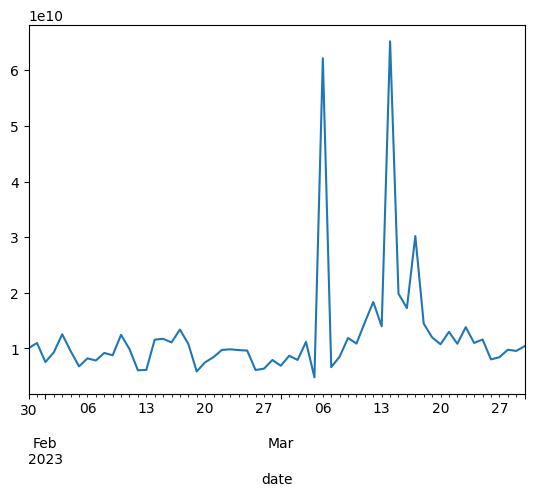

In [65]:
#we use line plot karena ini berkaitan dengan pergerakan waktu.
volume.plot(kind='line')

<AxesSubplot:xlabel='date'>

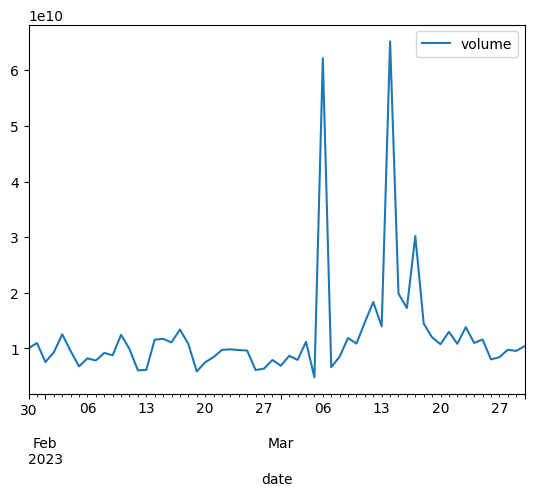

In [66]:
#menggunakan data awal 'df' tapi kita copy saja buat incase error
df2 = df.copy()
Volume_mean = pd.pivot_table(
    data = df2,
    index ='date',
    values = 'volume',
    aggfunc = 'mean')

Volume_mean.plot(kind='line')

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:xlabel='date'>

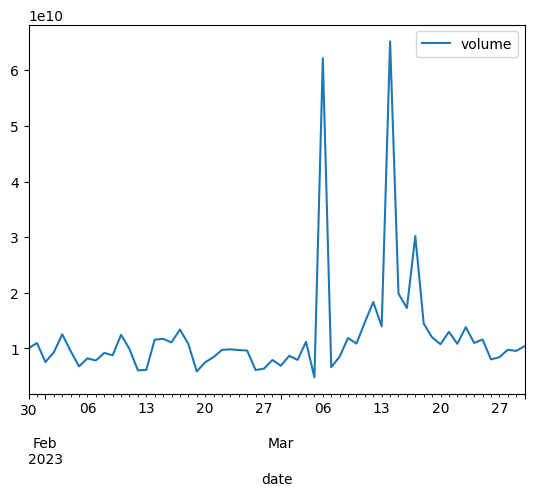

In [67]:
Volume_mean.plot(kind='line')

After we did data wringgling and visualization,we can see the plot and make an analysis. As we can see taht March 14 has the highest volume for the last three months.

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.